In [1]:
import sys
sys.path.append("../src")
from utils import *

In [2]:
sc.set_figure_params(dpi=100)
plt.rcParams["font.family"] = ["arial"]

In [4]:
from matplotlib import font_manager

font_dirs = "/usr/share/fonts/truetype/msttcorefonts/"
font_files = font_manager.findSystemFonts(fontpaths=font_dirs)

In [5]:
# custom_font_manager = matplotlib.font_manager.FontManager()
for font_file in font_files:
    font_manager.fontManager.addfont(font_file)

In [6]:
import matplotlib

In [7]:
matplotlib.pyplot.rcParams['font.family'] = "arial"
# matplotlib.pyplot.rcParams['font.weight'] = "regular"

matplotlib.pyplot.rcParams['figure.dpi'] = 100
matplotlib.pyplot.rcParams['figure.figsize'] = [5,5]

In [8]:
adata = sc.read(os.path.join(datadir, "anca_samples_annotated_v2.h5ad"))

In [9]:
df_celltypes = pd.read_csv(os.path.join(datadir, "celltypes_with_cm.csv"),
                           index_col=0).loc[adata.obs.index]

In [10]:
tcells = ["TFH", "TH1", "TH17", "Tc1", "Tc17"] # "Treg",
tcells_rename = [e.capitalize() for e in tcells]

In [11]:
mapping = dict(zip(tcells, tcells_rename))

In [12]:
df_celltypes.rename(columns=mapping, inplace=True)

In [13]:
adata_df = AnnData(df_celltypes)
adata_df.obs["cluster_annot"] = adata.obs["cluster_annot"].copy()

In [14]:
sc.pp.scale(adata_df)

In [15]:
adata_df.to_df().to_csv(os.path.join(datadir, "celltypes_z_with_cm.csv"))

In [16]:
sc.set_figure_params(dpi=100)

In [17]:
order = ["PT", "PT/LOH", "LOH", "PT/DCT", "DCT/CNT",
         "CNT/PC/IC", "CNT/PC",
         "Tubulointerstitial", 
         "Vasculature",
         "Normal glomerular",
         "Inflamed glomerular",
         "Inflamed tubulointerstitial",]
         

In [18]:
for ct in order:
    if ct not in adata_df.obs["cluster_annot"].cat.categories:
        print(ct)

In [19]:
adata_df.obs["cluster_annot"] = adata_df.obs["cluster_annot"].astype("category").cat.reorder_categories(order)

In [20]:
# order = ["PT", "LOH", "CNT", "CD",
#          "Podo", "Endo", "Fib",
#          "B cell", "Mac", "Neu",
#          "CD8T naive", "CD4+ Tcm",
#          "CD4T naive"] + tcells_rename
order = ["NKT"] + tcells_rename

In [21]:
# sc.pl.matrixplot(adata_df, var_names=order, groupby="cluster_annot", vmin=-1, vmax=1, cmap="RdBu_r", vcenter=0,
#                 colorbar_title="z-score", show=False)
# plt.savefig(os.path.join(figdir, "cell_types_z_scores_with_cm.pdf"), bbox_inches="tight")

In [22]:
cmap="Reds"

In [23]:
from matplotlib.colors import LinearSegmentedColormap

In [24]:
def create_colormap():
    colors = [(1, 1, 1), (1, 0, 0)]  # White to Red
    cmap_name = 'white_to_red'
    return LinearSegmentedColormap.from_list(cmap_name, colors, N=1000)

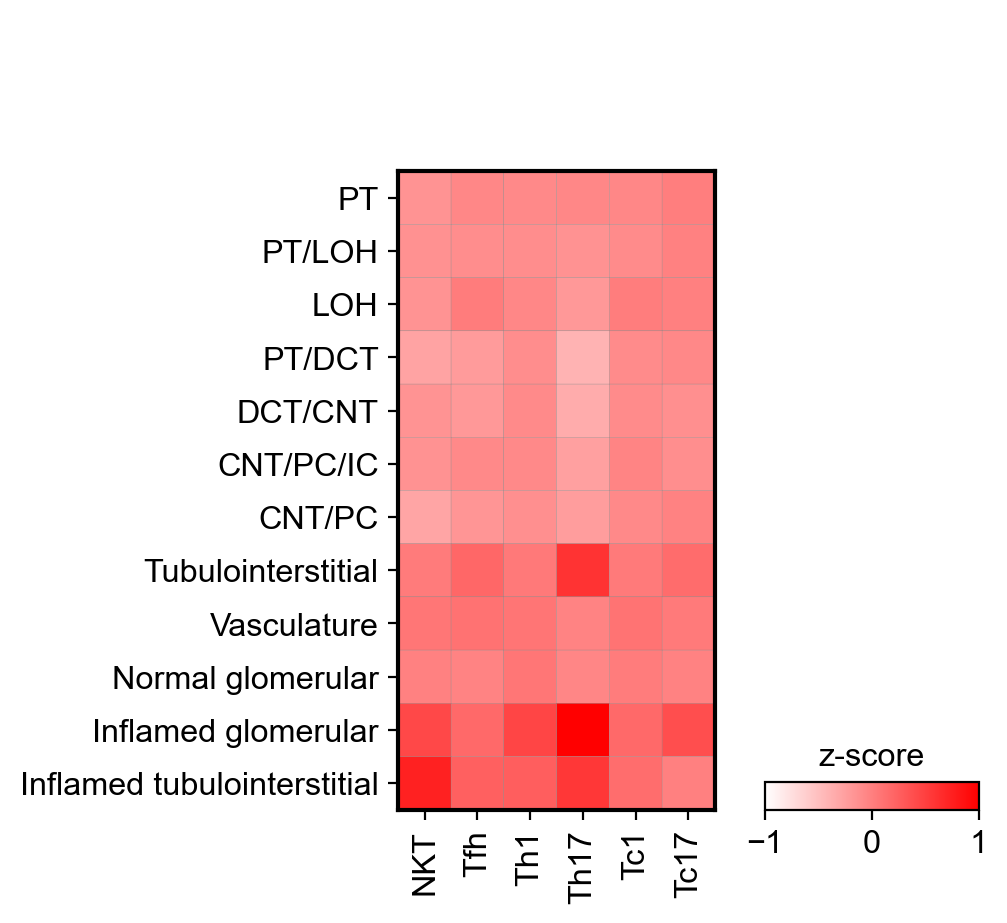

In [27]:
cmap = create_colormap()
cmap_name = "wr"
sc.pl.matrixplot(adata_df, var_names=order, groupby="cluster_annot", cmap=cmap, vmax=1,
                colorbar_title="z-score", show=False, vmin=-1)
plt.savefig(os.path.join(figdir, f"cell_types_z_scores_{cmap_name}.pdf"), bbox_inches="tight")

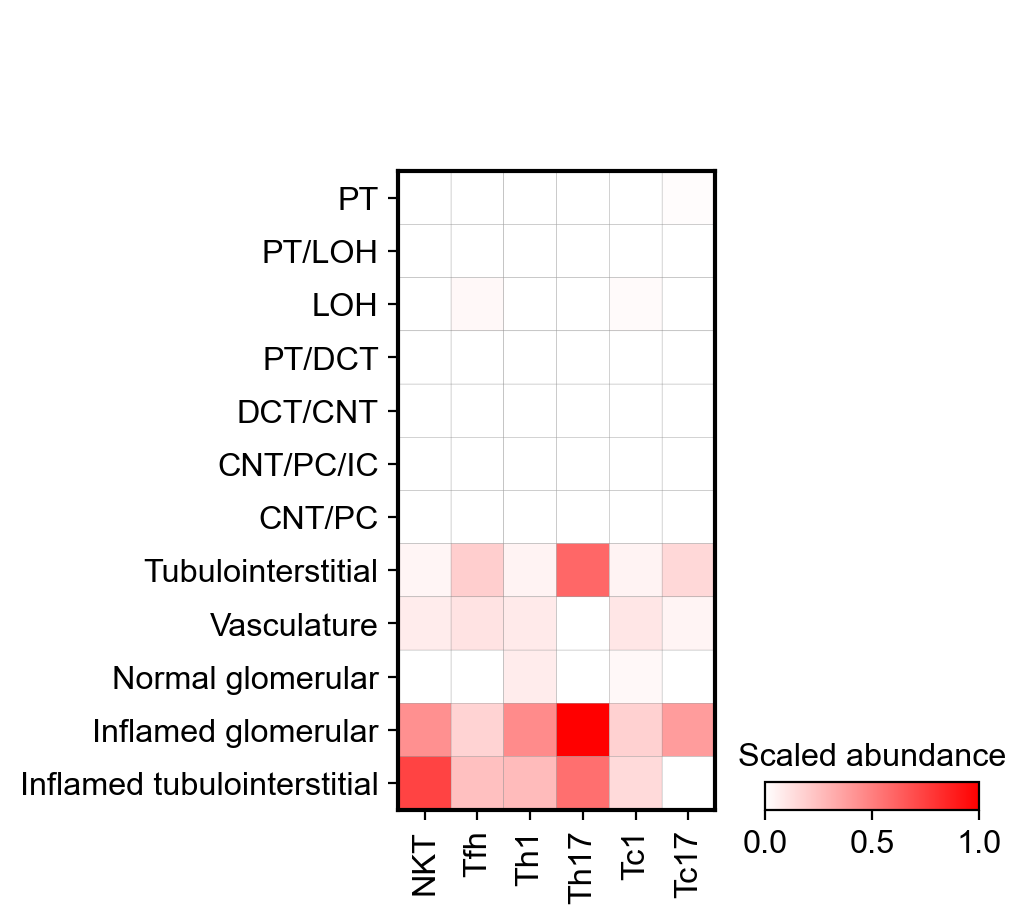

In [28]:
cmap = create_colormap()
cmap_name = "wr"
sc.pl.matrixplot(adata_df, var_names=order, groupby="cluster_annot", cmap=cmap, vmax=1,
                colorbar_title="Scaled abundance", show=False, vmin=0)
plt.savefig(os.path.join(figdir, f"cell_types_scaled_{cmap_name}.pdf"), bbox_inches="tight")

In [31]:
to_rename = ["PT", "PT/TAL", "LOH", "PT/DCT", "DCT/CNT", "CNT/PC/IC", "CNT/PC"]

In [32]:
adata_df.obs["cluster_annot"].replace(dict(zip(to_rename, ["Tubular"]*len(to_rename))), inplace=True)

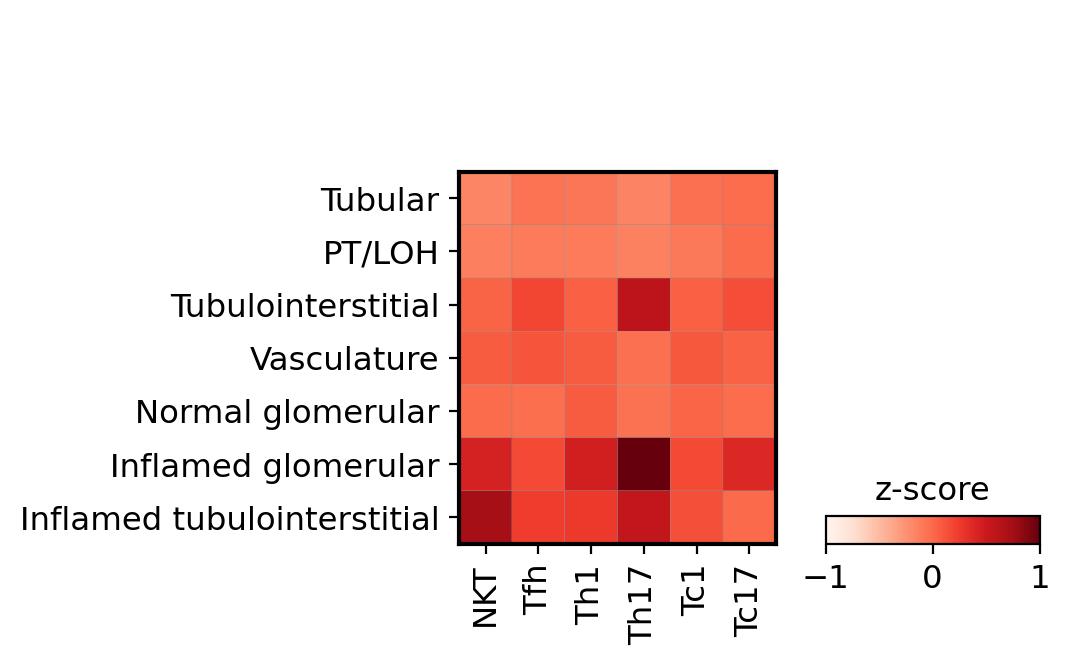

In [33]:
sc.pl.matrixplot(adata_df, var_names=order, groupby="cluster_annot", vmin=-1, vmax=1, cmap=cmap, vcenter=0,
                colorbar_title="z-score", show=False)
plt.savefig(os.path.join(figdir, f"cell_types_z_scores_mergedTubules_{cmap}.pdf"), bbox_inches="tight")